### 2.4.5 PTBデータセットでの評価

In [1]:
include("../common/util.jl")

ppmi (generic function with 1 method)

In [2]:
using Plots
gr()

Plots.GRBackend()

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = length(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

7×7 Array{Float64,2}:
 0.0      1.80735   0.0       0.0      0.0       0.0       0.0
 1.80735  0.0       0.807355  0.0      0.807355  0.807355  0.0
 0.0      0.807355  0.0       1.80735  0.0       0.0       0.0
 0.0      0.0       1.80735   0.0      1.80735   0.0       0.0
 0.0      0.807355  0.0       1.80735  0.0       0.0       0.0
 0.0      0.807355  0.0       0.0      0.0       0.0       2.80735
 0.0      0.0       0.0       0.0      0.0       2.80735   0.0

In [4]:
# SVD
U, S, V = svd(W)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
7×7 Array{Float64,2}:
  0.340949      2.22045e-16  -3.05311e-16  …  -0.932325     -4.38419e-17
 -1.11022e-16  -0.597636     -0.180238         2.22045e-16   1.2326e-32
  0.436312      5.55112e-17  -2.22045e-16      0.225326      0.707107
 -5.55112e-17  -0.497828     -0.680396         0.0          -2.08855e-17
  0.436312      2.34281e-17  -1.19999e-16      0.225326     -0.707107
  0.709237      2.34281e-17  -1.19999e-16  …   0.170959     -5.20488e-17
  3.33067e-16  -0.628489      0.710335        -3.33067e-16   2.68919e-17
singular values:
7-element Array{Float64,1}:
 3.168045227581944
 3.168045227581943
 2.702987144948016
 2.7029871449480156
 1.5144811118721977
 1.514481111872197
 1.4900013709856457e-16
Vt factor:
7×7 Array{Float64,2}:
 -0.0        0.597636      0.0          …   3.33067e-16  0.628489
 -0.340949   0.0          -0.436312        -0.709237     0.0
 -0.120516  -3.88578e-16  -0.508783         0.683927     0.0
  0.0       -0.18023

共起行列

In [5]:
println(C[1, :])

Int32[0, 1, 0, 0, 0, 0, 0]


PPMI行列

In [6]:
println(W[1, :])

[0.0, 1.8073549261795898, 0.0, 0.0, 0.0, 0.0, 0.0]


SVD

In [7]:
println(U[1, :])

[0.34094875178340045, 2.220446049250313e-16, -3.0531133177191805e-16, -0.12051624121189437, -1.1102230246251565e-16, -0.9323249349135193, -4.384185643109561e-17]


単語のプロット

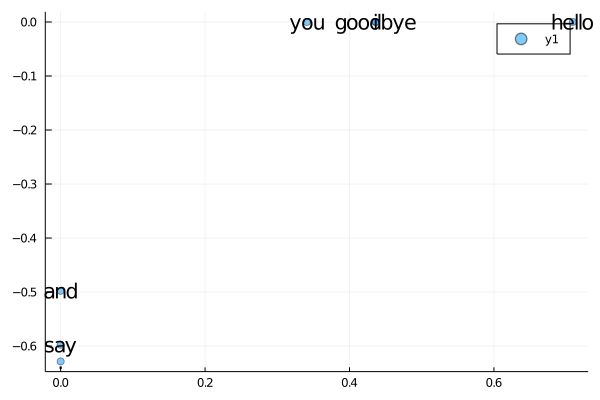

In [8]:
scatter(U[:, 1], U[:, 2]; alpha=0.5)
annotate!([(U[word_id, 1], U[word_id, 2], word) for (word, word_id) = pairs(word_to_id)])